# 4.3  Web Scraping using Beautiful Soup 🍲

#### BeautifulSoup is a Python library that helps parse HTML code for you, so you don’t have to write a lot of complex regular expressions yourself.

> HINT: Use a nice browser that allows you to easily view the HTML code side-by-side with the webpage. For example, in Google Chrome, you can right-click (or ctrl+click) a webpage and click ‘View Page Source’. You can also click ‘Inspect’ to get a more interactive comparison of the HTML code that corresponds to a section of the website you’re interested in.

In [ ]:
#!pip install beautifulsoup4

## GOAL: Extract information from a HTML page and store it in a table

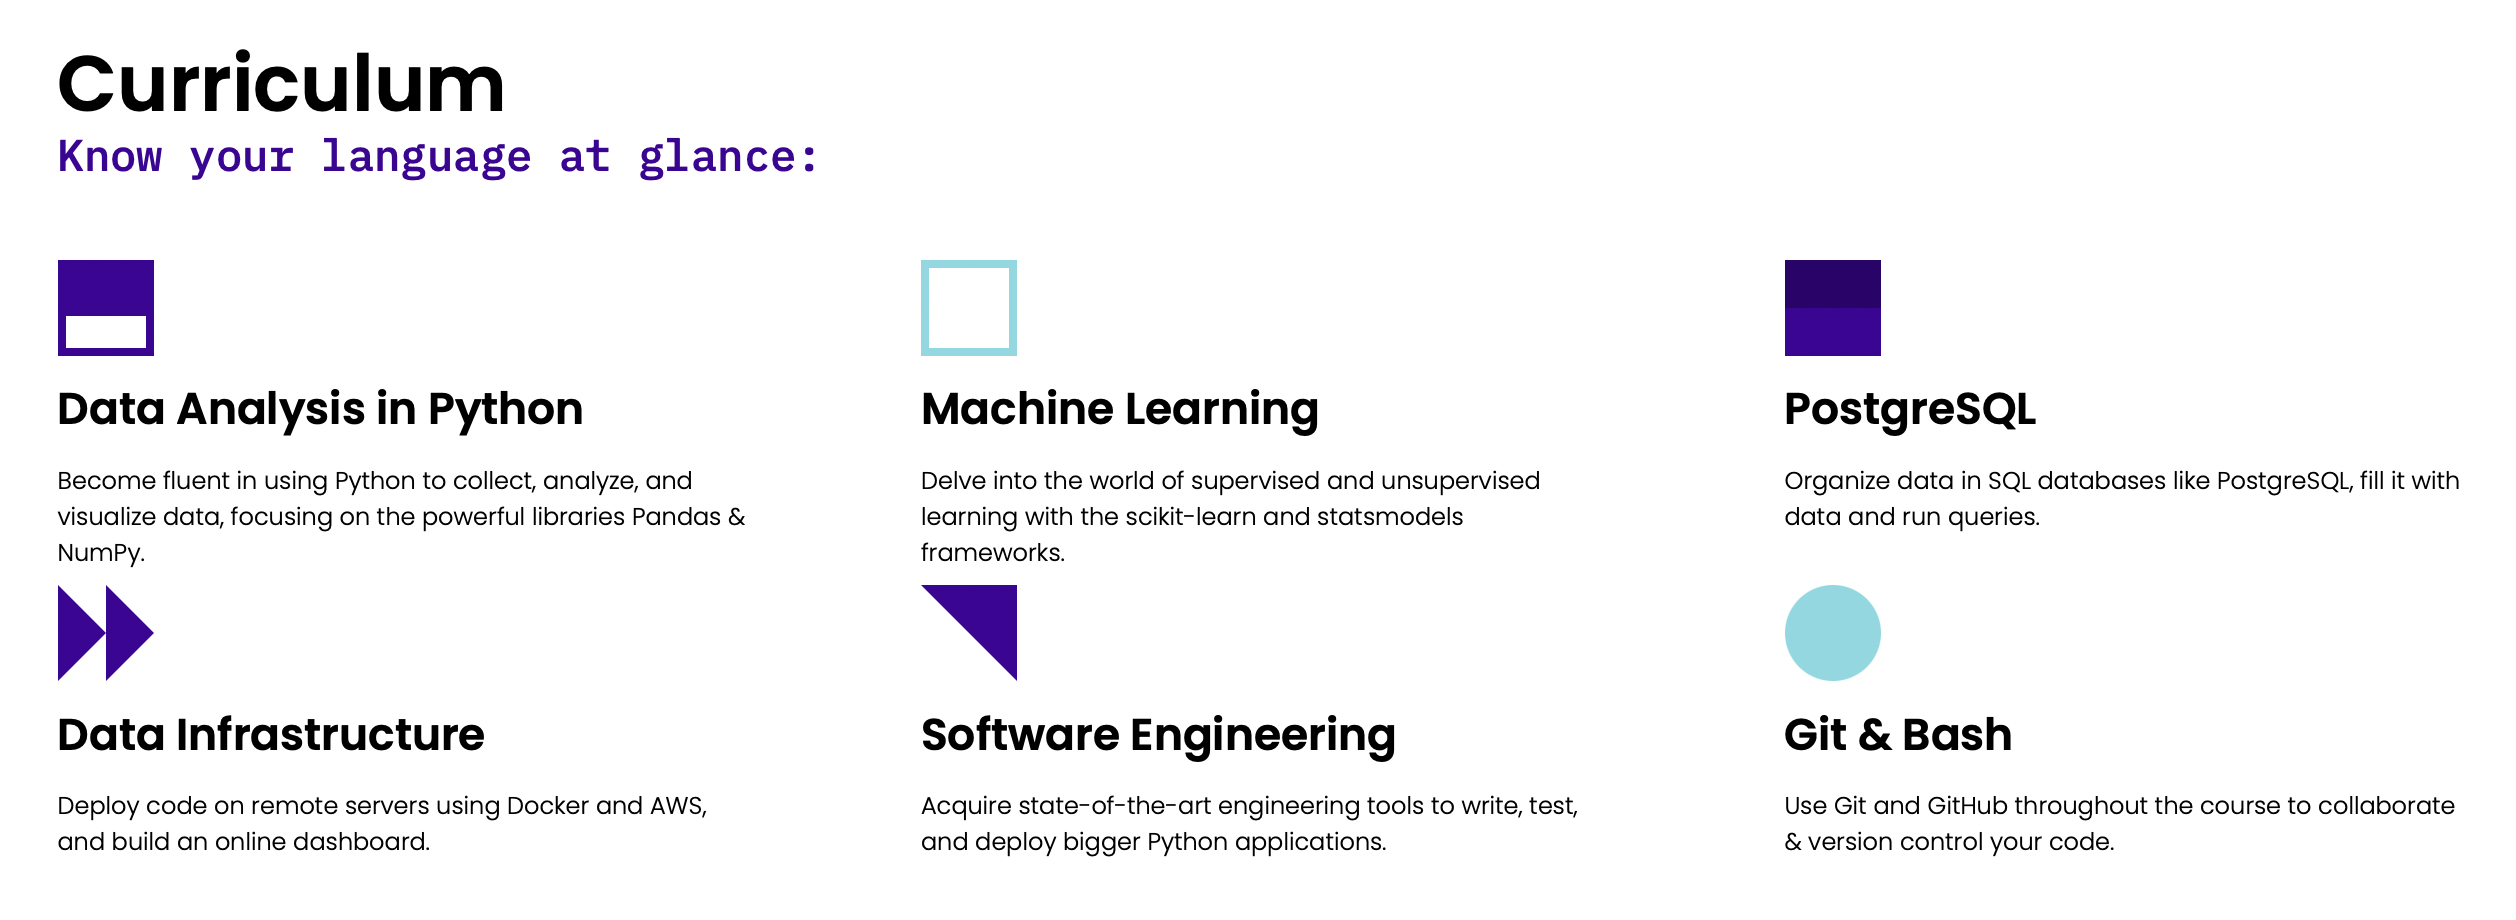

### Step 1: Decide which website to use
 

In [1]:
url1 = 'https://www.eventbrite.com/d/germany--berlin/music--events/'


### Step 2: Get the HTML text from a website

In [2]:
import requests

In [4]:
response = requests.get(url1)
music = response.text
type(music)

str

In [ ]:
# Inspect first 100 characters

In [5]:
music[:100]

'<!DOCTYPE html>\n\n\n\n\n\n\n\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" la'


### Step 3. Convert the raw HTML string to a BeautifulSoup object, so that we can parse the data.
Convert the raw HTML string to a BeautifulSoup object, so that we can parse the data.


In [7]:
from bs4 import BeautifulSoup

In [8]:
music_soup = BeautifulSoup(music, 'html.parser')

> Print Soup Object

In [9]:
print(music_soup)

<!DOCTYPE html>

<html lang="en-us" translate="no" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#">
<head>
<title>
    Berlin, Germany Music Events | Eventbrite
</title>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="en" http-equiv="Content-Language">
<link href="https://cdn.evbstatic.com/s3-build/309747-rc2022-01-04_16.04-95e27e1/django/images/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="https://cdn.evbstatic.com/s3-build/309747-rc2022-01-04_16.04-95e27e1/django/images/favicons/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/>
<link href="https://cdn.evbstatic.com/s3-build/309747-rc2022-01-04_16.04-95e27e1/django/images/favicons/favicon-96x96.png" rel="icon" sizes="96x96" type="image/png"/>
<link href="https://cdn.evbstatic.com/s3-build/309747-rc2022-01-04_16.04-95e27e1/django/images/favicons/android-chrome-192x192.png" rel="icon" sizes="192x192" type="i

### Step 4: Navigate the tree

* Use the BeautifulSoup object to find the tags with the information you want.


The methods we can use on a BeautifulSoup object are:

.prettify() - convert the returned BS object into formatted html output

.find() - returns the instance of your "query"

.find_all() - find all instances of an html attribute


There are several other find and find_all methods which replicate the above behaviour, but for particular attributes, and include (find_next / find_all_next / find_previous / find_all_previous / find_parent / next_sibling / previous_sibling)


In [10]:
music_soup.prettify()

'<!DOCTYPE html>\n<html lang="en-us" translate="no" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#">\n <head>\n  <title>\n   Berlin, Germany Music Events | Eventbrite\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>\n  <meta content="en" http-equiv="Content-Language">\n   <link href="https://cdn.evbstatic.com/s3-build/309747-rc2022-01-04_16.04-95e27e1/django/images/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>\n   <link href="https://cdn.evbstatic.com/s3-build/309747-rc2022-01-04_16.04-95e27e1/django/images/favicons/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/>\n   <link href="https://cdn.evbstatic.com/s3-build/309747-rc2022-01-04_16.04-95e27e1/django/images/favicons/favicon-96x96.png" rel="icon" sizes="96x96" type="image/png"/>\n   <link href="https://cdn.evbstatic.com/s3-build/309747-rc2022-01-04_16.04-95e27e1/django/images/favicons/android-chrome-192x192.png" 

In [11]:
music_soup.head.title

<title>
    Berlin, Germany Music Events | Eventbrite
</title>

In [12]:
music_soup.head.title.text

'\n    Berlin, Germany Music Events | Eventbrite\n'

In [ ]:
# .text returns the actual part of the tag that is outside of the < angled brackets > 

In [13]:
music_soup.title.name

'title'

* Using Query methods:  find() and find_all()

In [14]:
music_soup.body.find_all('h3')

[<h3 class="eds-event-card-content__title eds-text-color--ui-800 eds-text-bl eds-text-weight--heavy"><div data-spec="event-card__formatted-name"><div class="eds-is-hidden-accessible">LASS ZOCKEN • INDIE vs HIPHOP • NEW DATE  26.02.22  • LIDO BERLIN</div><div aria-hidden="true" class="eds-event-card__formatted-name--is-clamped eds-event-card__formatted-name--is-clamped-three eds-text-weight--heavy" data-spec="event-card__formatted-name--content" role="presentation">LASS ZOCKEN • INDIE vs HIPHOP • NEW DATE  26.02.22  • LIDO BERLIN</div></div></h3>,
 <h3 class="eds-event-card-content__title eds-text-color--ui-800 eds-text-bl eds-text-weight--heavy"><div data-spec="event-card__formatted-name"><div class="eds-is-hidden-accessible">LASS ZOCKEN • INDIE vs HIPHOP • NEW DATE  26.02.22  • LIDO BERLIN</div><div aria-hidden="true" class="eds-event-card__formatted-name--is-clamped eds-event-card__formatted-name--is-clamped-three eds-text-weight--heavy" data-spec="event-card__formatted-name--content

#### We can use a list comprehension!

In [16]:
[t.text for t in music_soup.find_all('h3', class_='eds-event-card-content__title eds-text-color--ui-800 eds-text-bl eds-text-weight--heavy')]

['LASS ZOCKEN • INDIE vs HIPHOP • NEW DATE  26.02.22  • LIDO BERLINLASS ZOCKEN • INDIE vs HIPHOP • NEW DATE  26.02.22  • LIDO BERLIN',
 'LASS ZOCKEN • INDIE vs HIPHOP • NEW DATE  26.02.22  • LIDO BERLINLASS ZOCKEN • INDIE vs HIPHOP • NEW DATE  26.02.22  • LIDO BERLIN',
 'Satantango liveSatantango live',
 'Satantango liveSatantango live',
 'MONOM + Vorspiel / transmediale & CTM presents: Dripping PointMONOM + Vorspiel / transmediale & CTM presents: Dripping Point',
 'MONOM + Vorspiel / transmediale & CTM presents: Dripping PointMONOM + Vorspiel / transmediale & CTM presents: Dripping Point',
 'Chaosbay + Sentryturn // Cassiopeia, BerlinChaosbay + Sentryturn // Cassiopeia, Berlin',
 'Chaosbay + Sentryturn // Cassiopeia, BerlinChaosbay + Sentryturn // Cassiopeia, Berlin',
 'Dark Rave meets Devil  Rave / Timo Mandl (Verschoben)Dark Rave meets Devil  Rave / Timo Mandl (Verschoben)',
 'Dark Rave meets Devil  Rave / Timo Mandl (Verschoben)Dark Rave meets Devil  Rave / Timo Mandl (Verschoben)'

In [17]:
music_soup.find_all('h3', attrs={'class': 'eds-event-card-content__title eds-text-color--ui-800 eds-text-bl eds-text-weight--heavy'})

[<h3 class="eds-event-card-content__title eds-text-color--ui-800 eds-text-bl eds-text-weight--heavy"><div data-spec="event-card__formatted-name"><div class="eds-is-hidden-accessible">LASS ZOCKEN • INDIE vs HIPHOP • NEW DATE  26.02.22  • LIDO BERLIN</div><div aria-hidden="true" class="eds-event-card__formatted-name--is-clamped eds-event-card__formatted-name--is-clamped-three eds-text-weight--heavy" data-spec="event-card__formatted-name--content" role="presentation">LASS ZOCKEN • INDIE vs HIPHOP • NEW DATE  26.02.22  • LIDO BERLIN</div></div></h3>,
 <h3 class="eds-event-card-content__title eds-text-color--ui-800 eds-text-bl eds-text-weight--heavy"><div data-spec="event-card__formatted-name"><div class="eds-is-hidden-accessible">LASS ZOCKEN • INDIE vs HIPHOP • NEW DATE  26.02.22  • LIDO BERLIN</div><div aria-hidden="true" class="eds-event-card__formatted-name--is-clamped eds-event-card__formatted-name--is-clamped-three eds-text-weight--heavy" data-spec="event-card__formatted-name--content

In [18]:

for t in music_soup.find_all('h3', attrs={'class': 'eds-event-card-content__title eds-text-color--ui-800 eds-text-bl eds-text-weight--heavy'}):
    print(t.text)

LASS ZOCKEN • INDIE vs HIPHOP • NEW DATE  26.02.22  • LIDO BERLINLASS ZOCKEN • INDIE vs HIPHOP • NEW DATE  26.02.22  • LIDO BERLIN
LASS ZOCKEN • INDIE vs HIPHOP • NEW DATE  26.02.22  • LIDO BERLINLASS ZOCKEN • INDIE vs HIPHOP • NEW DATE  26.02.22  • LIDO BERLIN
Satantango liveSatantango live
Satantango liveSatantango live
MONOM + Vorspiel / transmediale & CTM presents: Dripping PointMONOM + Vorspiel / transmediale & CTM presents: Dripping Point
MONOM + Vorspiel / transmediale & CTM presents: Dripping PointMONOM + Vorspiel / transmediale & CTM presents: Dripping Point
Chaosbay + Sentryturn // Cassiopeia, BerlinChaosbay + Sentryturn // Cassiopeia, Berlin
Chaosbay + Sentryturn // Cassiopeia, BerlinChaosbay + Sentryturn // Cassiopeia, Berlin
Dark Rave meets Devil  Rave / Timo Mandl (Verschoben)Dark Rave meets Devil  Rave / Timo Mandl (Verschoben)
Dark Rave meets Devil  Rave / Timo Mandl (Verschoben)Dark Rave meets Devil  Rave / Timo Mandl (Verschoben)
HISS – 25 Jahre JubiläumskonzertHISS –

In [21]:
print(music_soup.find_all('div'))   
 

# Good way to query / identify elements of the HTML page is by their class or id. 
# In HTML, the difference between class and id is that an id is unique, while is a class is not.


[<div class="eds-g-grid eds-l-mar-top-2 eds-l-mar-bot-2 eds-hide" id="unsupported-browser-alert">
<div class="eds-g-cell eds-g-cell-1-1">
<div class="eds-notification-bar eds-notification-bar--warning">
<span>
                Your version of Internet Explorer is not longer supported. Please <a href="/support/articles/en_US/Troubleshooting/how-to-troubleshoot-internet-browser-issues" target="_blank">upgrade your browser</a>.
            </span>
</div>
</div>
</div>, <div class="eds-g-cell eds-g-cell-1-1">
<div class="eds-notification-bar eds-notification-bar--warning">
<span>
                Your version of Internet Explorer is not longer supported. Please <a href="/support/articles/en_US/Troubleshooting/how-to-troubleshoot-internet-browser-issues" target="_blank">upgrade your browser</a>.
            </span>
</div>
</div>, <div class="eds-notification-bar eds-notification-bar--warning">
<span>
                Your version of Internet Explorer is not longer supported. Please <a href="/s

In [ ]:
# find returns thw first instance of your query

In [ ]:
music_soup.body.find(class_ = "description")

In [ ]:
spiced_soup.body.find(class_ = "description").h3

In [ ]:
spiced_soup.body.find(class_ = "description").find(class_="mob-hidden").text #chains


* If you want to grab multiple things (e.g. all curriculum-mini-sections) in one query, use .find_all()

In [ ]:
ds_curriculum = spiced_soup.find_all(class_ = 'curriculum-mini-section') 
# find_all returns a list like object called "Result Set"

In [ ]:
ds_curriculum[0]

In [ ]:
ds_curriculum[0].h3

In [ ]:
## Loop through the list of objects and extract title + description

In [ ]:
topic = []
description = []

for items in ds_curriculum:
    topic.append(items.h3.text)
    description.append(items.find(class_ = "mob-hidden").text)


In [ ]:
topic

In [ ]:
description

In [ ]:
import pandas as pd

In [ ]:
dataframe = pd.DataFrame({'topic':topic, 'description':description})

### Exercise 1: Scrape Eventbrite for Berlin music events

In [ ]:
url1 = 'https://www.eventbrite.com/d/germany--berlin/music--events/'

* BeautifulSoup Documentation: https://www.crummy.com/software/BeautifulSoup/bs4/doc/